In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# EDA

In [6]:
df = pd.read_csv('data/secondary_data.csv', delimiter = ';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


## Ranges of values

In [7]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


## Missing values:

In [8]:
df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

# Target variable 
e: edible
p: poisonous

In [9]:
df["class"].value_counts()

class
p    33888
e    27181
Name: count, dtype: int64

In [10]:
df["class"] = (df["class"] == 'p').astype(int)

## Feature Importance

In [11]:
numerical = ['cap-diameter', 'stem-height', 'stem-width']
categorical = ['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-root', 'stem-surface', 'stem-color','veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color','habitat', 'season']

In [12]:
df[['class','cap-diameter', 'stem-height', 'stem-width']].corr()

,class,cap-diameter,stem-height,stem-width
class,1.000000,-0.181139,-0.121593,-0.197368
cap-diameter,-0.181139,1.000000,0.422560,0.695330
stem-height,-0.121593,0.422560,1.000000,0.436117
stem-width,-0.197368,0.695330,0.436117,1.000000


In [13]:
df[numerical].corrwith(df['class']).abs()

cap-diameter    0.181139
stem-height     0.121593
stem-width      0.197368
dtype: float64

In [14]:
global_poisonous = df['class'].mean()


for c in categorical:
    print(c)
    df_group = df.groupby(c)['class'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_poisonous
    df_group['ratio'] = df_group['mean'] / global_poisonous
    display(df_group.sort_values(by=['ratio']))
    print()
    print()

cap-shape


,mean,count,diff,ratio
cap-shape,,,,
p,0.396844,2598,-0.158070,0.715145
f,0.514921,13404,-0.039992,0.927930
x,0.518824,26934,-0.036090,0.934964
s,0.540061,7164,-0.014852,0.973236
c,0.573554,1815,0.018640,1.033592
o,0.761561,3460,0.206647,1.372396
b,0.779066,5694,0.224152,1.403941




cap-surface


,mean,count,diff,ratio
cap-surface,,,,
s,0.429811,7608,-0.125103,0.774555
h,0.473864,4974,-0.081049,0.853943
y,0.475004,6341,-0.079909,0.855997
l,0.500000,1412,-0.054913,0.901042
e,0.521672,2584,-0.033241,0.940096
d,0.537681,4432,-0.017233,0.968945
g,0.584251,4724,0.029337,1.052868
w,0.599070,2150,0.044156,1.079574
t,0.655564,8196,0.100650,1.181380




cap-color


,mean,count,diff,ratio
cap-color,,,,
b,0.208130,1230,-0.346783,0.375068
l,0.454106,828,-0.100807,0.818337
g,0.480317,4420,-0.074597,0.865571
n,0.487695,24218,-0.067218,0.878867
w,0.510827,7666,-0.044086,0.920553
y,0.579656,8543,0.024743,1.044588
k,0.608288,1279,0.053374,1.096185
u,0.642481,1709,0.087568,1.157804
o,0.707057,3656,0.152144,1.274175




does-bruise-or-bleed


,mean,count,diff,ratio
does-bruise-or-bleed,,,,
t,0.533333,10590,-0.021580,0.961111
f,0.559441,50479,0.004527,1.008159




gill-attachment


,mean,count,diff,ratio
gill-attachment,,,,
p,0.294118,6001,-0.260796,0.530025
e,0.375000,5648,-0.179913,0.675781
s,0.562500,5648,0.007587,1.013672
x,0.571429,7413,0.016515,1.029762
f,0.600000,3530,0.045087,1.081250
d,0.601835,10247,0.046921,1.084556
a,0.626319,12698,0.071406,1.128679




gill-spacing


,mean,count,diff,ratio
gill-spacing,,,,
d,0.409091,7766,-0.145822,0.737216
c,0.585714,24710,0.030801,1.055506
f,0.600000,3530,0.045087,1.081250




gill-color


,mean,count,diff,ratio
gill-color,,,,
b,0.255765,954,-0.299148,0.460910
w,0.454295,18521,-0.100618,0.818678
g,0.471831,4118,-0.083082,0.850279
u,0.571848,1023,0.016934,1.030517
o,0.579581,2909,0.024667,1.044453
p,0.587999,5983,0.033086,1.059624
y,0.588309,9546,0.033396,1.060182
f,0.600000,3530,0.045087,1.081250
k,0.609263,2375,0.054350,1.097943




stem-root


,mean,count,diff,ratio
stem-root,,,,
b,0.333333,3177,-0.221580,0.600694
s,0.555556,3177,0.000642,1.001157
c,1.000000,706,0.445087,1.802083
f,1.000000,1059,0.445087,1.802083
r,1.000000,1412,0.445087,1.802083




stem-surface


,mean,count,diff,ratio
stem-surface,,,,
s,0.411286,6025,-0.143627,0.741172
t,0.534039,2644,-0.020874,0.962383
i,0.637853,4396,0.082939,1.149464
k,0.669829,1581,0.114916,1.207088
y,0.680364,4940,0.125451,1.226073
f,1.000000,1059,0.445087,1.802083
g,1.000000,1765,0.445087,1.802083
h,1.000000,535,0.445087,1.802083




stem-color


,mean,count,diff,ratio
stem-color,,,,
b,0.000000,173,-0.554913,0.000000
g,0.392993,2626,-0.161920,0.708206
w,0.426721,22926,-0.128193,0.768986
l,0.535398,226,-0.019515,0.964832
n,0.595416,18063,0.040503,1.072989
o,0.607682,2187,0.052768,1.095093
u,0.642282,1490,0.087369,1.157445
y,0.682899,7865,0.127986,1.230641
e,0.737561,2050,0.182648,1.329146




veil-type


,mean,count,diff,ratio
veil-type,,,,
u,0.666667,3177,0.111753,1.201389




veil-color


,mean,count,diff,ratio
veil-color,,,,
y,0.000000,527,-0.554913,0.000000
w,0.515893,5474,-0.039020,0.929683
e,1.000000,181,0.445087,1.802083
k,1.000000,353,0.445087,1.802083
n,1.000000,525,0.445087,1.802083
u,1.000000,353,0.445087,1.802083




has-ring


,mean,count,diff,ratio
has-ring,,,,
f,0.538462,45890,-0.016452,0.970353
t,0.604651,15179,0.049738,1.089632




ring-type


,mean,count,diff,ratio
ring-type,,,,
m,0.000000,353,-0.554913,0.000000
l,0.385424,1427,-0.169489,0.694566
g,0.430645,1240,-0.124268,0.776058
r,0.504646,1399,-0.050267,0.909414
f,0.554745,48361,-0.000169,0.999696
e,0.565092,2435,0.010179,1.018344
p,0.566798,1265,0.011885,1.021418
z,1.000000,2118,0.445087,1.802083




spore-print-color


,mean,count,diff,ratio
spore-print-color,,,,
g,0.000000,353,-0.554913,0.000000
w,0.417492,1212,-0.137422,0.752355
p,0.719619,1259,0.164705,1.296813
k,0.833333,2118,0.278420,1.501736
n,1.000000,1059,0.445087,1.802083
r,1.000000,171,0.445087,1.802083
u,1.000000,182,0.445087,1.802083




habitat


,mean,count,diff,ratio
habitat,,,,
u,0.000000,115,-0.554913,0.000000
w,0.000000,353,-0.554913,0.000000
l,0.388258,3168,-0.166656,0.699673
m,0.511301,2920,-0.043612,0.921408
d,0.543916,44209,-0.010997,0.980183
h,0.652174,2001,0.097261,1.175272
g,0.686642,7943,0.131729,1.237387
p,1.000000,360,0.445087,1.802083




season


,mean,count,diff,ratio
season,,,,
w,0.393203,5267,-0.161710,0.708585
s,0.430510,2727,-0.124404,0.775814
a,0.576333,30177,0.021420,1.038600
u,0.578697,22898,0.023784,1.042860


In [15]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df['class'])

mi = df[categorical].fillna('na').apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

stem-surface            0.043530
stem-color              0.041965
stem-root               0.036138
cap-color               0.031035
cap-surface             0.029012
ring-type               0.028514
spore-print-color       0.026991
gill-attachment         0.025504
veil-color              0.020887
cap-shape               0.019520
gill-color              0.018656
habitat                 0.018296
season                  0.006817
gill-spacing            0.006516
has-ring                0.001667
veil-type               0.001422
does-bruise-or-bleed    0.000197
dtype: float64

# Model training & Evaluation

## data preprocessing

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, shuffle=False)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, shuffle=False)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train["class"]
y_val = df_val["class"]
y_test = df_test["class"]

del df_train['class']
del df_val['class']
del df_test['class']

In [14]:
df_full_train = df_full_train.fillna('na')
df_train = df_train.fillna('na')
df_val = df_val.fillna('na')
df_test = df_test.fillna('na')

In [15]:
df_full_train["class"].mean()

0.570811585303449

In [16]:
df_full_train.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [17]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [18]:
X_train.shape

(36641, 109)

## Logistic regression

In [19]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [20]:
y_pred = model.predict_proba(X_val)[:, 1]
class_decision = (y_pred >= 0.5)
(y_val == class_decision).mean()


0.5832651056165057

In [21]:
roc_auc_score(y_val, y_pred)

0.6134075583131249

In [22]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'cap-color=b': -0.303,
 'cap-color=e': 1.751,
 'cap-color=g': 0.952,
 'cap-color=k': 0.43,
 'cap-color=l': -3.982,
 'cap-color=n': -0.179,
 'cap-color=o': 0.475,
 'cap-color=p': -0.006,
 'cap-color=r': 1.346,
 'cap-color=u': -0.395,
 'cap-color=w': -0.371,
 'cap-color=y': 0.114,
 'cap-diameter': -0.124,
 'cap-shape=b': 1.471,
 'cap-shape=c': -2.698,
 'cap-shape=f': 1.609,
 'cap-shape=p': -2.856,
 'cap-shape=s': 1.275,
 'cap-shape=x': 1.031,
 'cap-surface=d': -0.817,
 'cap-surface=e': -7.077,
 'cap-surface=g': -2.257,
 'cap-surface=h': -1.062,
 'cap-surface=i': 5.362,
 'cap-surface=k': 8.335,
 'cap-surface=l': -3.325,
 'cap-surface=na': -1.029,
 'cap-surface=s': -2.946,
 'cap-surface=t': 0.879,
 'cap-surface=w': 7.877,
 'cap-surface=y': -4.108,
 'does-bruise-or-bleed=f': 1.423,
 'does-bruise-or-bleed=t': -1.591,
 'gill-attachment=a': -0.149,
 'gill-attachment=d': 1.988,
 'gill-attachment=e': -2.12,
 'gill-attachment=na': 1.251,
 'gill-attachment=s': -1.44,
 'gill-attachment=x': 0.301,


# Decision tree & parameter tuning

In [23]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.531
   2 -> 0.461
   3 -> 0.451
   4 -> 0.595
   5 -> 0.449
   6 -> 0.403
  10 -> 0.549
  15 -> 0.441
  20 -> 0.419
None -> 0.505


In [28]:
scores = []

for depth in [3, 4, 5]:
    for s in [1, 5, 10, 15, 20, 50, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [29]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [30]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             3      4      5
min_samples_leaf                     
1                 0.451  0.595  0.449
5                 0.451  0.595  0.449
10                0.451  0.595  0.449
15                0.451  0.595  0.458
20                0.451  0.595  0.449
50                0.451  0.595  0.465
100               0.451  0.596  0.465
200               0.465  0.620  0.502
500               0.453  0.516  0.450

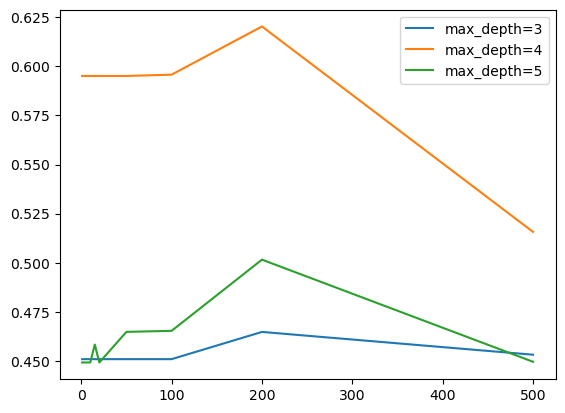

In [32]:
for d in [3, 4, 5]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.min_samples_leaf, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

# Final Model

In [42]:
max_depth=4
min_samples_leaf = 200

In [36]:
def train(df_train, y_train, max_depth, min_samples_leaf):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    
    return dv, model

In [39]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [40]:
dv, model = train(df_full_train, df_full_train['class'].values, max_depth=4, min_samples_leaf = 200)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.5143495049768114

In [41]:
import pickle

In [46]:
output_file = f'model_depth={max_depth}_samples={min_samples_leaf}.bin'

with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, model), f_out)

# Testing Flask app

In [6]:
import requests

In [ ]:
Mushroom = {
    "cap-diameter":14.17, 
    "cap-shape": "f",
    "cap-surface":"h",
    "cap-color":"e",
    "does-bruise-or-bleed":"f",
    "gill-attachment":"e",
    "gill-spacing":None,
    "gill-color":"w",
    "stem-height":15.77,
    "stem-width":15.98,
    "stem-root":"s",
    "stem-surface":"y",
    "stem-color":"w",
    "veil-type":"u",
    "veil-color":"w",
    "has-ring":"t",
    "ring-type":"p",
    "spore-print-color":None,
    "habitat":"d",
    "season":"w"
    }

## locally

In [5]:
url = "http://localhost:9696/predict"
requests.post(url,json = Mushroom).json()

## Remote

In [7]:
url = 'https://mushroom-app.orangepebble-a9df90f9.westeurope.azurecontainerapps.io/predict'
requests.post(url,json = Mushroom).json()

{'poison_probability': 0.9897321428571428, 'poisonous': True}